# Data Science Regression Project : Walmart Sales Forecasting

## Walmart Sales Forecasting

Data Science plays a huge role in forecasting sales and risks in the retail 

#### Problem Statement:
You are supposed to analyze the Walmart Sales Dataset in order to predict the sales

## Reading and exploring the Dataset

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
df =pd.read_csv("train.csv")
df.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [3]:
len(df)

421570

In [4]:
print("Number of rows in the whole dataset:" +str(len(df.index)))

Number of rows in the whole dataset:421570


In [5]:
df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


## Data Cleaning

In [7]:
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [8]:
df.duplicated().any()

False

#### There wasn't any null values or duplicated values in the dataset

## Data Exploration

In [10]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [11]:
df.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [12]:
df.Dept.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99, 39, 50, 43, 65], dtype=int64)

In [13]:
df.groupby(["Store", "Dept"]).describe()

Weekly_Sales                                                    \
                  count          mean           std       min         25%   
Store Dept                                                                  
1     1           143.0  22513.322937   9854.349032  14537.37  16494.6300   
      2           143.0  46102.090420   3440.673222  35819.83  44170.4600   
      3           143.0  13150.478042   8708.978853   6165.73   8693.0400   
      4           143.0  36964.154476   2930.698313  32497.43  34887.7400   
      5           143.0  24257.941119  11330.286495  11570.27  17972.5900   
...                 ...           ...           ...       ...         ...   
45    94          134.0   3690.272090   1852.287364      0.98   3171.8325   
      95          143.0  52896.166643   5117.961708  41131.42  49467.3600   
      96            2.0      2.970000      0.042426      2.94      2.9550   
      97          143.0   6466.961888    659.739542   4935.60   6048.1250   
      98          135.0    561.239037    371.286705      2.00    222.4800   

                                            
                  50%        75%       max  
Store Dept                                  
1     1     18535.480  23214.215  57592.12  
      2     45561.850  47612.245  65615.36  
      3     10366.850  12655.610  51159.17  
      4     36579.960  38268.405  47893.23  
      5     21183.420  25653.795  85676.09  
...               ...        ...       ...  
45    94     4120.155   4801.085   7639.88  
      95    52417.470  55822.955  75204.77  
      96        2.970      2.985      3.00  
      97     6470.520   6865.630   8765.09  
      98      619.410    836.350   1504.71  

[3331 rows x 8 columns]

In [14]:
df.corr()

,Store,Dept,Weekly_Sales,IsHoliday
Store,1.000000,0.024004,-0.085195,-0.000548
Dept,0.024004,1.000000,0.148032,0.000916
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774
IsHoliday,-0.000548,0.000916,0.012774,1.000000


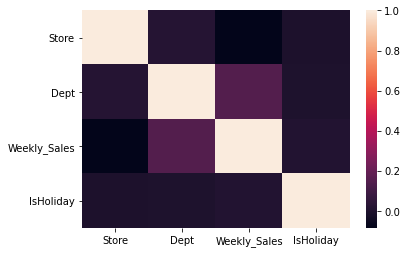

In [15]:
sns.heatmap(df.corr())

#### There isn't any correlation among the features

## Bivariate Analysis

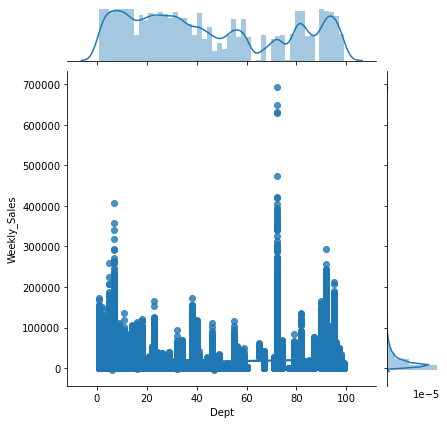

In [16]:
sns.jointplot(x= "Dept", y = "Weekly_Sales",data = df, kind = "reg")

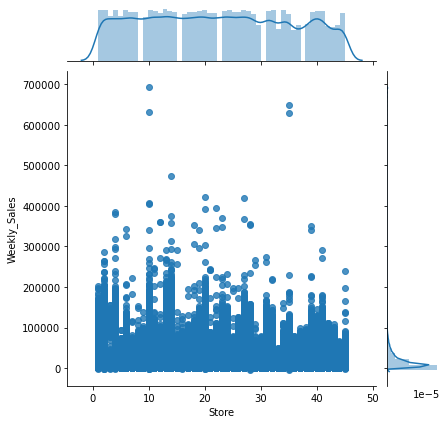

In [17]:
sns.jointplot(x= "Store", y = "Weekly_Sales",data = df, kind = "reg")

C:\Users\Mabel Karani\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


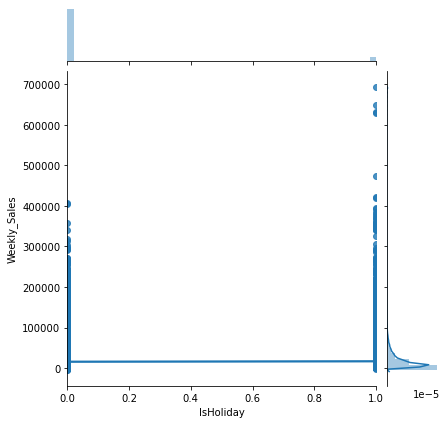

In [18]:
sns.jointplot(x= "IsHoliday", y = "Weekly_Sales",data = df, kind = "reg")

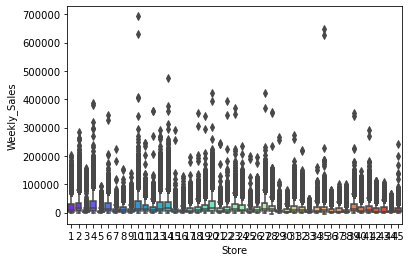

In [20]:
sns.boxplot(y = "Weekly_Sales",x= "Store", data = df, palette="rainbow")

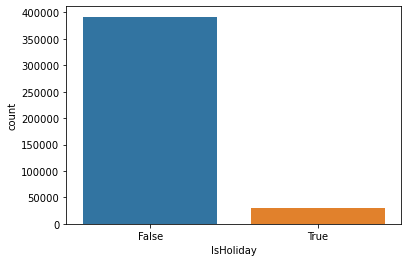

In [33]:
sns.countplot("IsHoliday", data = df)

## Multivariate Analysis

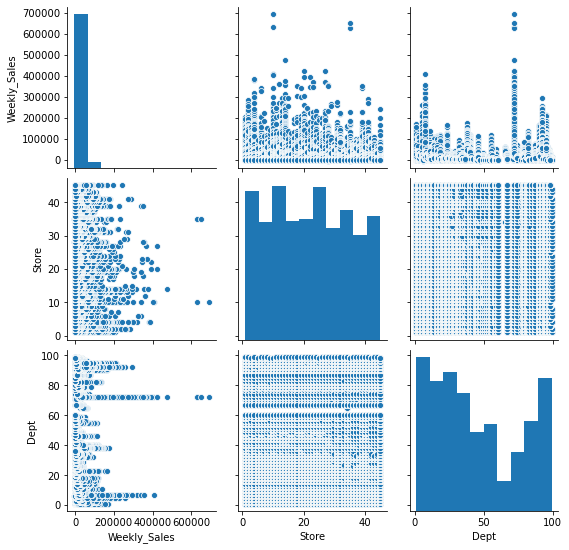

In [22]:
sns.pairplot(df, vars=['Weekly_Sales',"Store",'Dept'])

In [26]:
df["Date"].dtype

dtype('O')

## Converting to Datetime

In [27]:
df.Date =  pd.to_datetime(df.Date) 

In [29]:
df.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
dtype: object

In [4]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [12]:
X = df.iloc[:,[0,1,4]].values
y = df.iloc[:,[3]].values

In [15]:
df['Store'].dtype

dtype('int64')

In [16]:
df['Dept'].dtype

dtype('int64')

In [17]:
df['Weekly_Sales'].dtype

dtype('float64')

In [20]:
df['IsHoliday'].dtype

dtype('bool')

# convert weekly sales to integers

In [18]:
df['Weekly_Sales'] = df['Weekly_Sales'].apply(np.int64)

In [19]:
df['Weekly_Sales'].dtype

dtype('int64')

# Convert  IsHoliday to numerical value

In [21]:
df['IsHoliday'] = df['IsHoliday'].apply(np.int64)

In [22]:
df['IsHoliday'].dtype

dtype('int64')

In [23]:
df.dtypes

Store            int64
Dept             int64
Date            object
Weekly_Sales     int64
IsHoliday        int64
dtype: object

In [24]:
X = df.iloc[:,[0,1,4]].values
y = df.iloc[:,[3]].values

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
train_test_split =X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
classfier =LogisticRegression(random_state=0)
classfier.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MemoryError: Unable to allocate 150. GiB for an array with shape (316177, 63869) and data type int64